In [1]:
import netCDF4 as nc
import xarray as xr
import hvplot.xarray
import numpy as np

In [2]:
DATA_DIR='/data/bunde'

In [3]:
nc_file = f'{DATA_DIR}/EMIT_L2A_RFL_001_20230415T204729_2310514_003.nc'

In [4]:
ds_nc = nc.Dataset(nc_file)
ds_nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    ncei_template_version: NCEI_NetCDF_Swath_Template_v2.0
    summary: The Earth Surface Mineral Dust Source Investigation (EMIT) is an Earth Ventures-Instrument (EVI-4) Mission that maps the surface mineralogy of arid dust source regions via imaging spectroscopy in the visible and short-wave infrared (VSWIR). Installed on the International Space Station (ISS), the EMIT instrument is a Dyson imaging spectrometer that uses contiguous spectroscopic measurements from 410 to 2450 nm to resolve absoprtion features of iron oxides, clays, sulfates, carbonates, and other dust-forming minerals. During its one-year mission, EMIT will observe the sunlit Earth's dust source regions that occur within +/-52° latitude and produce maps of the source regions that can be used to improve forecasts of the role of mineral dust in the radiative forcing (warming or cooling) of the atmosphere.\n\nThis file contains L2A esti

In [5]:
ds = xr.open_dataset(nc_file)
ds

<xarray.Dataset>
Dimensions:      (downtrack: 1280, crosstrack: 1242, bands: 285)
Dimensions without coordinates: downtrack, crosstrack, bands
Data variables:
    reflectance  (downtrack, crosstrack, bands) float32 ...
Attributes: (12/38)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    southernmost_latitude:             44.96756138326307
    spatialResolution:                 0.000542232520256367
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.12065640e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...

In [6]:
ds_nc.groups.keys()

dict_keys(['sensor_band_parameters', 'location'])

In [7]:
wvl = xr.open_dataset(nc_file,group='sensor_band_parameters')
wvl

<xarray.Dataset>
Dimensions:           (bands: 285)
Dimensions without coordinates: bands
Data variables:
    wavelengths       (bands) float32 ...
    fwhm              (bands) float32 ...
    good_wavelengths  (bands) float32 ...

In [8]:
loc = xr.open_dataset(nc_file,group='location')
loc

<xarray.Dataset>
Dimensions:  (downtrack: 1280, crosstrack: 1242, ortho_y: 1913, ortho_x: 2480)
Dimensions without coordinates: downtrack, crosstrack, ortho_y, ortho_x
Data variables:
    lon      (downtrack, crosstrack) float64 ...
    lat      (downtrack, crosstrack) float64 ...
    elev     (downtrack, crosstrack) float64 ...
    glt_x    (ortho_y, ortho_x) float64 ...
    glt_y    (ortho_y, ortho_x) float64 ...

In [9]:
# Create coordinates and an index for the downtrack and crosstrack dimensions, then unpack the variables from the wvl and loc datasets and set them as coordinates for ds
ds = ds.assign_coords({'downtrack':(['downtrack'], ds.downtrack.data),'crosstrack':(['crosstrack'],ds.crosstrack.data), **wvl.variables, **loc.variables})
ds

<xarray.Dataset>
Dimensions:           (downtrack: 1280, crosstrack: 1242, bands: 285,
                       ortho_y: 1913, ortho_x: 2480)
Coordinates:
  * downtrack         (downtrack) int64 0 1 2 3 4 5 ... 1275 1276 1277 1278 1279
  * crosstrack        (crosstrack) int64 0 1 2 3 4 ... 1237 1238 1239 1240 1241
    wavelengths       (bands) float32 ...
    fwhm              (bands) float32 ...
    good_wavelengths  (bands) float32 ...
    lon               (downtrack, crosstrack) float64 ...
    lat               (downtrack, crosstrack) float64 ...
    elev              (downtrack, crosstrack) float64 ...
    glt_x             (ortho_y, ortho_x) float64 ...
    glt_y             (ortho_y, ortho_x) float64 ...
Dimensions without coordinates: bands, ortho_y, ortho_x
Data variables:
    reflectance       (downtrack, crosstrack, bands) float32 ...
Attributes: (12/38)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    southernmost_latitude:             44.96756138326307
    spatialResolution:                 0.000542232520256367
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.12065640e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...

In [10]:
del wvl
del loc

In [11]:
example = ds['reflectance'].sel(downtrack=660,crosstrack=370)
example.hvplot.line(y='reflectance',x='wavelengths', color='black', frame_height=400, frame_width=600)

:Curve   [wavelengths]   (reflectance)

In [12]:
ds['reflectance'].data[:,:,ds['good_wavelengths'].data==0] = np.nan

In [14]:
ds['reflectance'].sel(downtrack=660,crosstrack=370).hvplot.line(y='reflectance',x='wavelengths', color='black', frame_height=400, frame_width=600)

:Curve   [wavelengths]   (reflectance)

In [17]:
# refl850 = ds.sel(wavelengths=850, method='nearest')

In [18]:
ds

<xarray.Dataset>
Dimensions:           (downtrack: 1280, crosstrack: 1242, bands: 285,
                       ortho_y: 1913, ortho_x: 2480)
Coordinates:
  * downtrack         (downtrack) int64 0 1 2 3 4 5 ... 1275 1276 1277 1278 1279
  * crosstrack        (crosstrack) int64 0 1 2 3 4 ... 1237 1238 1239 1240 1241
    wavelengths       (bands) float32 ...
    fwhm              (bands) float32 ...
    good_wavelengths  (bands) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    lon               (downtrack, crosstrack) float64 ...
    lat               (downtrack, crosstrack) float64 ...
    elev              (downtrack, crosstrack) float64 ...
    glt_x             (ortho_y, ortho_x) float64 ...
    glt_y             (ortho_y, ortho_x) float64 ...
Dimensions without coordinates: bands, ortho_y, ortho_x
Data variables:
    reflectance       (downtrack, crosstrack, bands) float32 0.07627 ... 0.05857
Attributes: (12/38)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    southernmost_latitude:             44.96756138326307
    spatialResolution:                 0.000542232520256367
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.12065640e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...

In [22]:
ex = ds.sel(downtrack=660,crosstrack=370)

In [23]:
ex

<xarray.Dataset>
Dimensions:           (bands: 285, ortho_y: 1913, ortho_x: 2480)
Coordinates:
    downtrack         int64 660
    crosstrack        int64 370
    wavelengths       (bands) float32 ...
    fwhm              (bands) float32 ...
    good_wavelengths  (bands) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    lon               float64 ...
    lat               float64 ...
    elev              float64 ...
    glt_x             (ortho_y, ortho_x) float64 ...
    glt_y             (ortho_y, ortho_x) float64 ...
Dimensions without coordinates: bands, ortho_y, ortho_x
Data variables:
    reflectance       (bands) float32 0.2562 0.265 0.2718 ... 0.008463 0.006178
Attributes: (12/38)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    southernmost_latitude:             44.96756138326307
    spatialResolution:                 0.000542232520256367
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.12065640e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...

In [39]:
ex['reflectance']

<xarray.DataArray 'reflectance' (bands: 285)>
array([0.256234, 0.265047, 0.271837, ..., 0.008468, 0.008463, 0.006178],
      dtype=float32)
Coordinates:
    downtrack         int64 660
    crosstrack        int64 370
    wavelengths       (bands) float32 ...
    fwhm              (bands) float32 ...
    good_wavelengths  (bands) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    lon               float64 ...
    lat               float64 ...
    elev              float64 ...
Dimensions without coordinates: bands
Attributes:
    long_name:  Surface Reflectance
    units:      unitless

In [43]:
arr = ex['reflectance']

In [44]:
type (arr)

xarray.core.dataarray.DataArray

In [45]:
arr.shape

(285,)

In [46]:
arr2 = ds['reflectance'].values

In [47]:
arr2.shape

(1280, 1242, 285)

In [51]:
darr = arr2[:,:,0]

In [52]:
darr.shape

(1280, 1242)

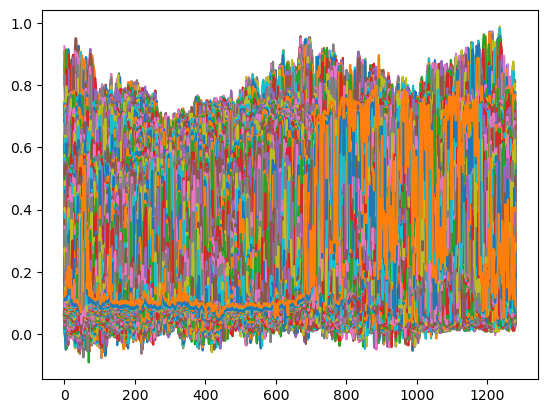

In [54]:
import matplotlib.pyplot as plt

plt.plot(darr)
plt.show()

In [55]:
darr

array([[0.07626886, 0.08827034, 0.08772466, ..., 0.10868391, 0.11138387,
        0.12142513],
       [0.09025283, 0.09810298, 0.08969787, ..., 0.10919242, 0.10919017,
        0.12166422],
       [0.10260461, 0.1349345 , 0.1328754 , ..., 0.11492091, 0.11195499,
        0.13514379],
       ...,
       [0.29605988, 0.2574257 , 0.2541575 , ..., 0.07162608, 0.0781959 ,
        0.17948914],
       [0.2092701 , 0.20976558, 0.27917618, ..., 0.06946331, 0.06977408,
        0.10419365],
       [0.12438146, 0.18070379, 0.23492278, ..., 0.06957145, 0.06885434,
        0.09265131]], dtype=float32)

In [56]:
dir(darr)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

In [59]:
darr.view()

array([[0.07626886, 0.08827034, 0.08772466, ..., 0.10868391, 0.11138387,
        0.12142513],
       [0.09025283, 0.09810298, 0.08969787, ..., 0.10919242, 0.10919017,
        0.12166422],
       [0.10260461, 0.1349345 , 0.1328754 , ..., 0.11492091, 0.11195499,
        0.13514379],
       ...,
       [0.29605988, 0.2574257 , 0.2541575 , ..., 0.07162608, 0.0781959 ,
        0.17948914],
       [0.2092701 , 0.20976558, 0.27917618, ..., 0.06946331, 0.06977408,
        0.10419365],
       [0.12438146, 0.18070379, 0.23492278, ..., 0.06957145, 0.06885434,
        0.09265131]], dtype=float32)

In [ ]:
#darr.coord

import matplotlib.pyplot as pyplot
from rasterio.plot import show

def my_plot(array):
    cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r']
    axs=()
    fig, axs = pyplot.subplots(4,4, figsize=(21,21))
    for i in range(0,4):
        for j in range(0,4):
            show(array, ax=axs[i][j], cmap=cmaps[i*4+j], title=cmaps[i*4+j])
    pyplot.show()

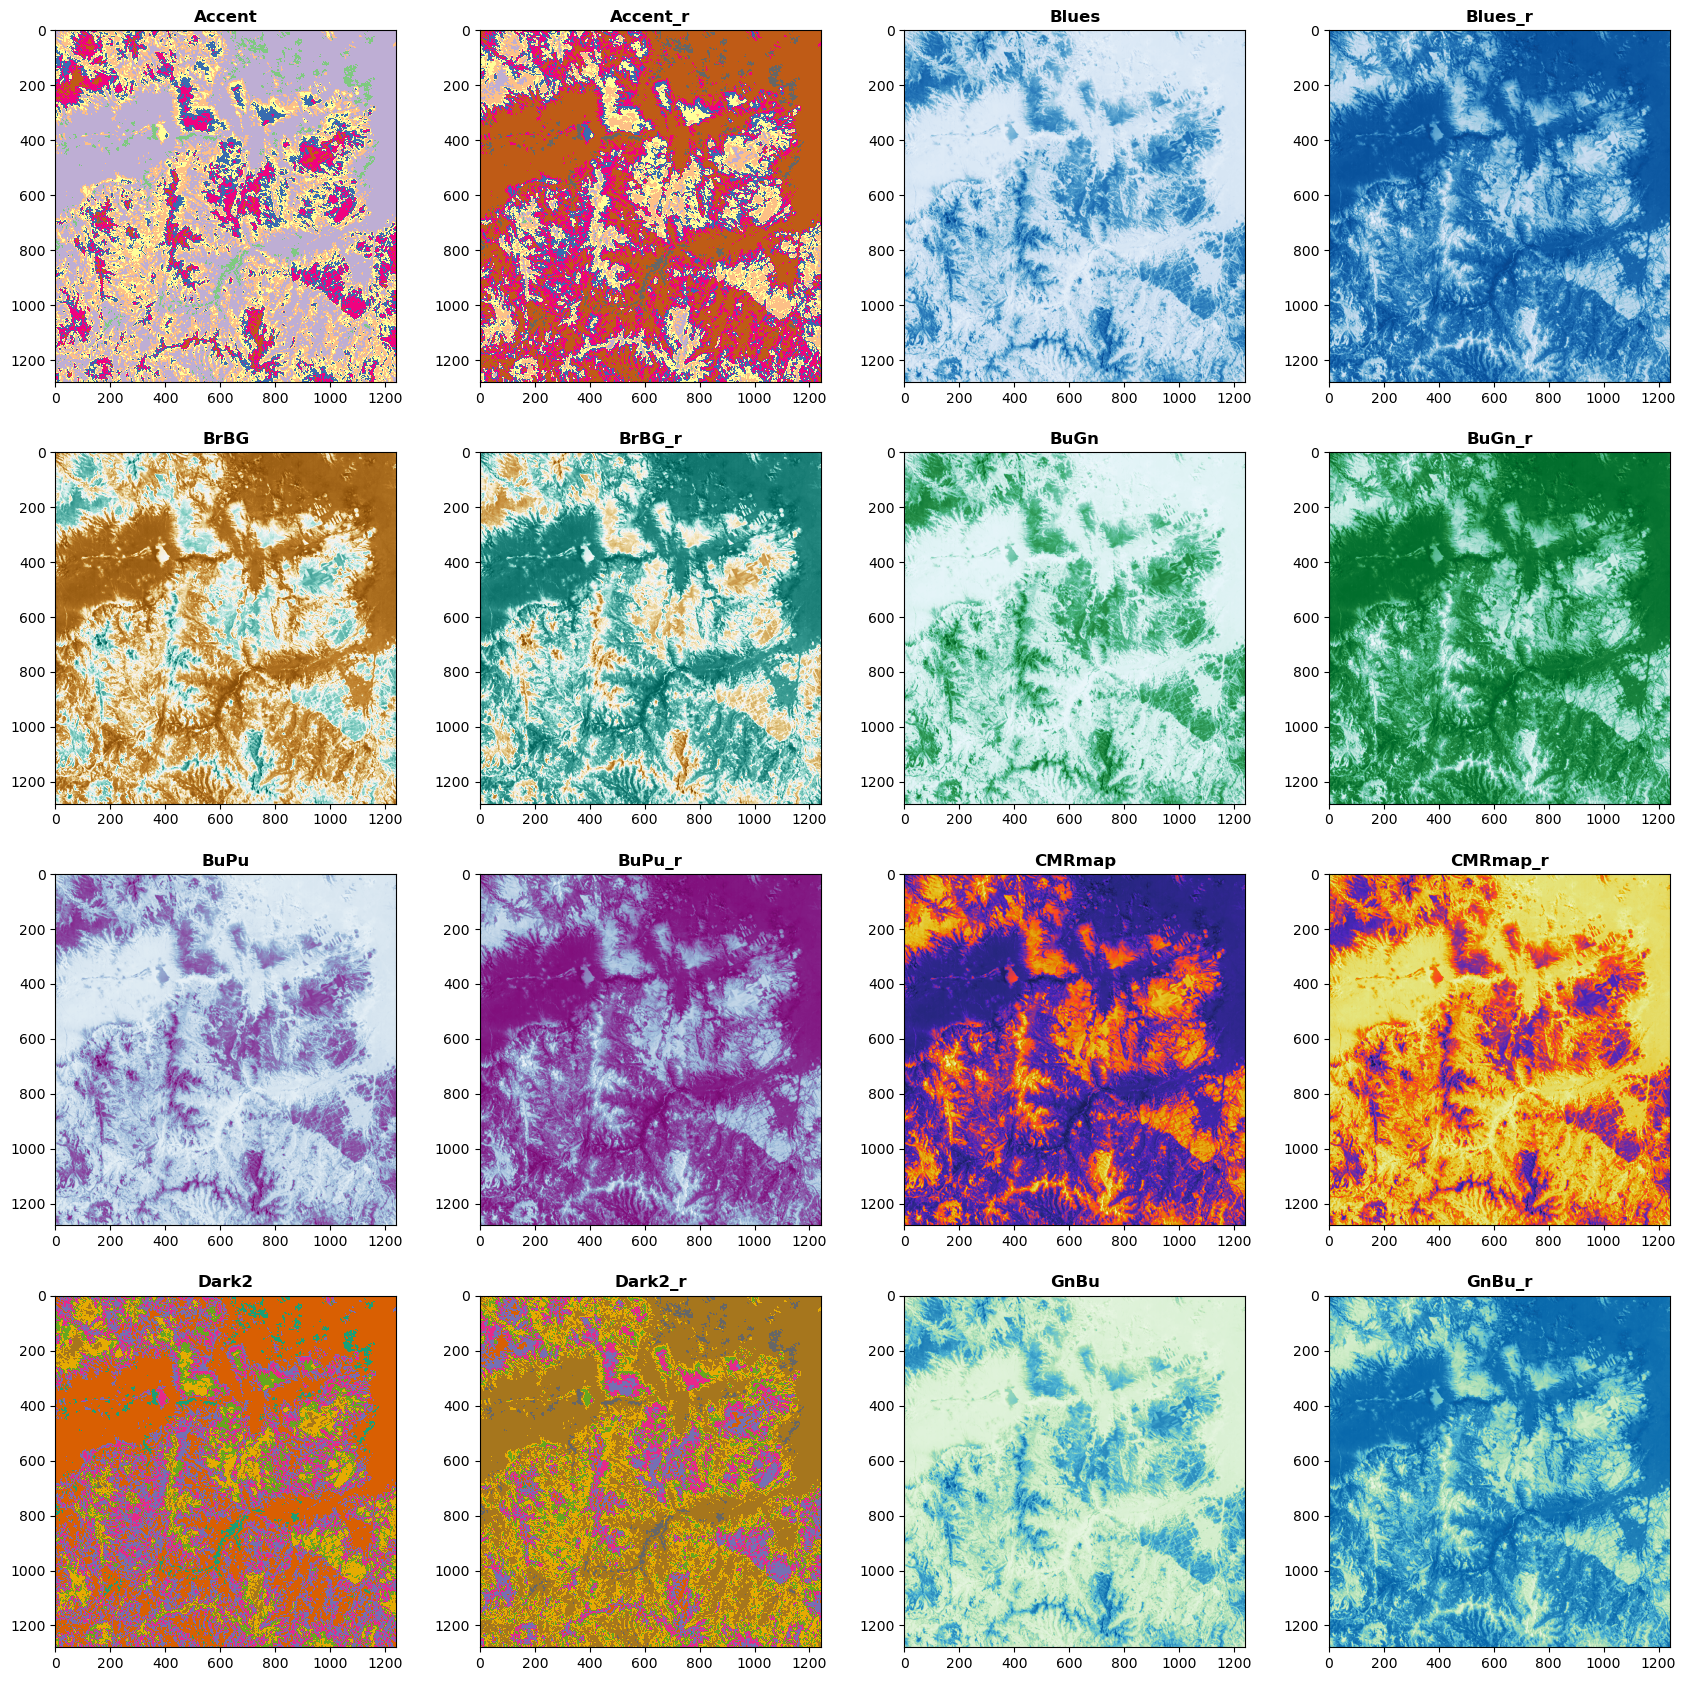

In [66]:
my_plot(darr)

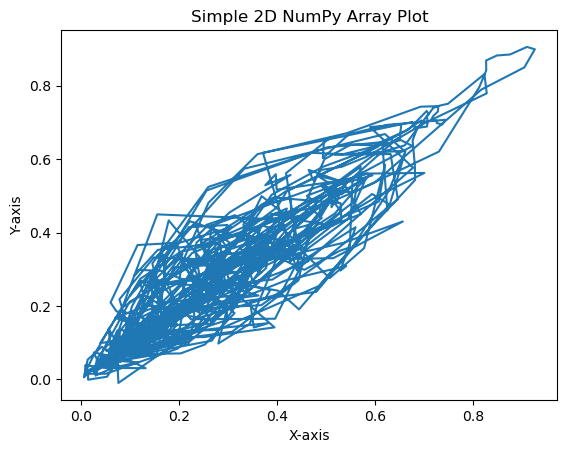

In [70]:
axs=()
plt.plot(darr)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple 2D NumPy Array Plot')

# Show the plot
plt.show()

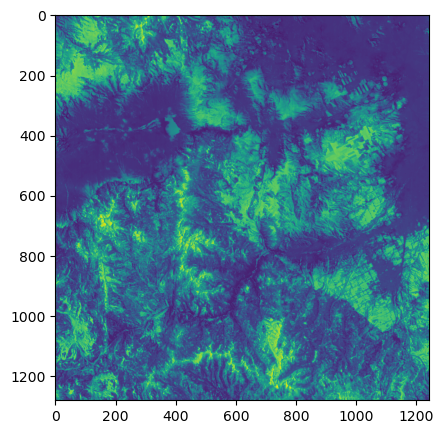

In [71]:
fig, ax = plt.subplots(figsize=(10, 5))

chm_plot = ax.imshow(darr,
                     cmap='viridis')

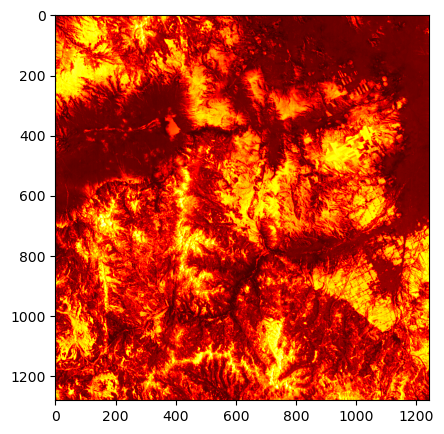

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))
a_plot = ax.imshow(darr,cmap='hot')
#plt.show()

In [76]:
ds

<xarray.Dataset>
Dimensions:           (downtrack: 1280, crosstrack: 1242, bands: 285,
                       ortho_y: 1913, ortho_x: 2480)
Coordinates:
  * downtrack         (downtrack) int64 0 1 2 3 4 5 ... 1275 1276 1277 1278 1279
  * crosstrack        (crosstrack) int64 0 1 2 3 4 ... 1237 1238 1239 1240 1241
    wavelengths       (bands) float32 ...
    fwhm              (bands) float32 ...
    good_wavelengths  (bands) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    lon               (downtrack, crosstrack) float64 ...
    lat               (downtrack, crosstrack) float64 ...
    elev              (downtrack, crosstrack) float64 ...
    glt_x             (ortho_y, ortho_x) float64 ...
    glt_y             (ortho_y, ortho_x) float64 ...
Dimensions without coordinates: bands, ortho_y, ortho_x
Data variables:
    reflectance       (downtrack, crosstrack, bands) float32 0.07627 ... 0.05857
Attributes: (12/38)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    southernmost_latitude:             44.96756138326307
    spatialResolution:                 0.000542232520256367
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.12065640e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...

In [79]:
import rasterio

In [80]:
my_data_array = ds['reflectance']

In [82]:
my_data_array

<xarray.DataArray 'reflectance' (downtrack: 1280, crosstrack: 1242, bands: 285)>
array([[[0.076269, 0.080235, ..., 0.064487, 0.050578],
        [0.08827 , 0.092773, ..., 0.057096, 0.043354],
        ...,
        [0.111384, 0.109266, ..., 0.066055, 0.046643],
        [0.121425, 0.119264, ..., 0.065217, 0.04652 ]],

       [[0.090253, 0.093285, ..., 0.055668, 0.043646],
        [0.098103, 0.100598, ..., 0.055347, 0.041763],
        ...,
        [0.10919 , 0.106064, ..., 0.055611, 0.041838],
        [0.121664, 0.119323, ..., 0.05746 , 0.044967]],

       ...,

       [[0.20927 , 0.215118, ..., 0.006566, 0.004736],
        [0.209766, 0.213592, ..., 0.006322, 0.004172],
        ...,
        [0.069774, 0.070094, ..., 0.071771, 0.04641 ],
        [0.104194, 0.102601, ..., 0.080501, 0.054926]],

       [[0.124381, 0.128352, ..., 0.007318, 0.005977],
        [0.180704, 0.183926, ..., 0.004886, 0.003969],
        ...,
        [0.068854, 0.067   , ..., 0.075999, 0.058735],
        [0.092651, 0.092715, ..., 0.083692, 0.058567]]], dtype=float32)
Coordinates:
  * downtrack         (downtrack) int64 0 1 2 3 4 5 ... 1275 1276 1277 1278 1279
  * crosstrack        (crosstrack) int64 0 1 2 3 4 ... 1237 1238 1239 1240 1241
    wavelengths       (bands) float32 ...
    fwhm              (bands) float32 ...
    good_wavelengths  (bands) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    lon               (downtrack, crosstrack) float64 ...
    lat               (downtrack, crosstrack) float64 ...
    elev              (downtrack, crosstrack) float64 ...
Dimensions without coordinates: bands
Attributes:
    long_name:  Surface Reflectance
    units:      unitless

In [86]:
da2 = my_data_array.rename({'downtrack': 'y', 'crosstrack': 'x'})

In [87]:
da2

<xarray.DataArray 'reflectance' (y: 1280, x: 1242, bands: 285)>
array([[[0.076269, 0.080235, ..., 0.064487, 0.050578],
        [0.08827 , 0.092773, ..., 0.057096, 0.043354],
        ...,
        [0.111384, 0.109266, ..., 0.066055, 0.046643],
        [0.121425, 0.119264, ..., 0.065217, 0.04652 ]],

       [[0.090253, 0.093285, ..., 0.055668, 0.043646],
        [0.098103, 0.100598, ..., 0.055347, 0.041763],
        ...,
        [0.10919 , 0.106064, ..., 0.055611, 0.041838],
        [0.121664, 0.119323, ..., 0.05746 , 0.044967]],

       ...,

       [[0.20927 , 0.215118, ..., 0.006566, 0.004736],
        [0.209766, 0.213592, ..., 0.006322, 0.004172],
        ...,
        [0.069774, 0.070094, ..., 0.071771, 0.04641 ],
        [0.104194, 0.102601, ..., 0.080501, 0.054926]],

       [[0.124381, 0.128352, ..., 0.007318, 0.005977],
        [0.180704, 0.183926, ..., 0.004886, 0.003969],
        ...,
        [0.068854, 0.067   , ..., 0.075999, 0.058735],
        [0.092651, 0.092715, ..., 0.083692, 0.058567]]], dtype=float32)
Coordinates:
  * y                 (y) int64 0 1 2 3 4 5 6 ... 1274 1275 1276 1277 1278 1279
  * x                 (x) int64 0 1 2 3 4 5 6 ... 1236 1237 1238 1239 1240 1241
    wavelengths       (bands) float32 ...
    fwhm              (bands) float32 ...
    good_wavelengths  (bands) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    lon               (y, x) float64 ...
    lat               (y, x) float64 ...
    elev              (y, x) float64 ...
Dimensions without coordinates: bands
Attributes:
    long_name:  Surface Reflectance
    units:      unitless

In [91]:
da3 = da2.transpose('bands', 'y', 'x')

In [92]:
da3.rio.to_raster('/data/bunde/ref.tif')

In [93]:
! gdalinfo /data/bunde/ref.tif

Driver: GTiff/GeoTIFF
Files: /data/bunde/ref.tif
Size is 1242, 1280
Origin = (-0.500000000000000,-0.500000000000000)
Pixel Size = (1.000000000000000,1.000000000000000)
Metadata:
  long_name=Surface Reflectance
  units=unitless
Image Structure Metadata:
  INTERLEAVE=PIXEL
Corner Coordinates:
Upper Left  (  -0.5000000,  -0.5000000) 
Lower Left  (      -0.500,    1279.500) 
Upper Right (    1241.500,      -0.500) 
Lower Right (    1241.500,    1279.500) 
Center      (     620.500,     639.500) 
Band 1 Block=1242x1 Type=Float32, ColorInterp=Gray
  Description = Surface Reflectance
  NoData Value=-9999
Band 2 Block=1242x1 Type=Float32, ColorInterp=Undefined
  Description = Surface Reflectance
  NoData Value=-9999
Band 3 Block=1242x1 Type=Float32, ColorInterp=Undefined
  Description = Surface Reflectance
  NoData Value=-9999
Band 4 Block=1242x1 Type=Float32, ColorInterp=Undefined
  Description = Surface Reflectance
  NoData Value=-9999
Band 5 Block=1242x1 Type=Float32, ColorInterp=Undefined
